In [66]:
# Imports & stuff

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.colors as cls
from cycler import cycler

# Constants
time = 1800
discount = 0.99
pres_sarsop = []
pres_ub = []
all_envs = ["ABC", "Tiger", "RockSample5", "RockSample10", "K-out-of-N2", "K-out-of-N3", 
            "FrozenLake4", "FrozenLake10", "Tag", "Hallway1", "Hallway2", "MiniHallway", "TigerGrid"] # All envs
all_envs = ["ABC", "Tiger", "RockSample5", "RockSample10", "K-out-of-N2", "K-out-of-N3", 
            "FrozenLake4", "FrozenLake10", "Tag", "SparseHallway1", "SparseHallway2", "SparseTigerGrid"] # All envs
Env_to_latex_name = {
    "ABC" : "\\custom",
    "Tiger":"\\tiger",
    "RockSample5": "\\rocksample (5)",
    "RockSample10": "\\rocksample (10)",
    "K-out-of-N2":"\\koutofn (2)",
    "K-out-of-N3":"\\koutofn (3)",
    "FrozenLake4":"\\lake (4)",
    "FrozenLake10":"\\lake (10)",
    "Tag":"\\tagenv",
    "Hallway1":"\\hallway1",
    "Hallway2":"\\hallway2",
    "TigerGrid":"\\tigergrid",
    "SparseHallway1":"\\hallwayone",
    "SparseHallway2":"\\hallwaytwo",
    "SparseTigerGrid":"\\tigergrid",
    "MiniHallway":"\\minihallway"
}



# all_envs = ["ABC", "Tiger", "RockSample5", "FrozenLake4"] #Testing envs
# all_envs = ["ABC", "Tiger", "RockSample5", "FrozenLake4", "FrozenLake10", "K-out-of-N3"] #Testing envs
pre_sarsop = "./Data/SarsopTest/Sarsoptest_"
pre_ub = "./Data/UpperBounds/UpperBoundTest_"
post_sarsop = f"_t{time}_d{str(discount)[2:]}.json"
post_ub =f"_d{str(discount)}.json"
for env in all_envs:
    pres_sarsop.append(pre_sarsop + env + "_" )
    pres_ub.append(pre_ub + env + "_")

# solvers = ["SARSOP", "BIB-SARSOP", "EBIB-SARSOP"]
solvers = ["SARSOP", "BIB-SARSOP", "EBIB-SARSOP"]
# solvers = ["SARSOP", "BIB-SARSOP"]

def get_data_plot(env:str):
    ts, ubs, lbs = [], [], []
    solvernames, envname = [], ""
    for s in solvers:
        with open(pre_sarsop+env+"_"+s+post_sarsop) as file:
            data = json.load(file)
            ts.append(data["times"])
            ubs.append(data["ubs"])
            lbs.append(data["lbs"])
            solvernames.append(data["solver"])
            envname = data["env_full"]

    return ts, ubs, lbs, solvernames, envname

### Plotting

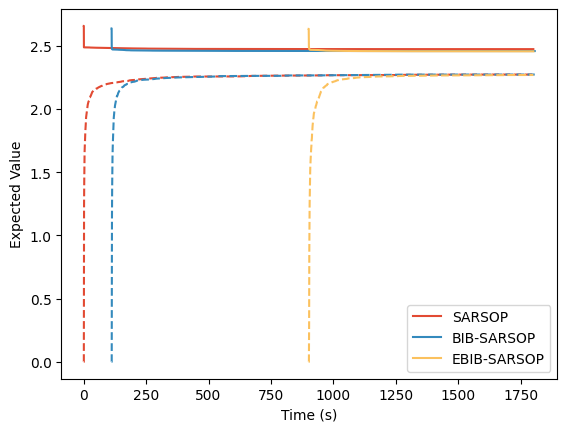

In [62]:
# TigerGrid

ts, ubs, lbs, solvernames, envname = get_data_plot("SparseTigerGrid")

colours =  ['#E24A33', '#348ABD',  '#FBC15E', '#8EBA42', '#FFB5B8']

# colours = [(226, 74, 51), (52, 138, 189), (152, 142, 213)]

for (i,label) in enumerate(solvernames):
    plt.plot(ts[i],ubs[i], label=label, color=colours[i], linestyle="-")
    plt.plot(ts[i],lbs[i], label=None, color=colours[i], linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Expected Value")
# plt.ylim(-3, -1.6)
plt.legend()
plt.show()

### Tables

In [67]:
# SARSOP Convergence times

def get_vars_sarsop(data:dict):
    if data["timeout"]:
        diff =  abs((data["final_ub"] - data["final_lw"] ) / data["final_lw"])
        # return f'- ({diff:.2f})'
        return f'- ({data["final_lw"]:.2f}, {data["final_ub"]:.2f})'
    else:
        return f'{data["runtime"]:.2f}s'


# labels = ["\\SARSOP", "\\BIBSARSOP", "\\EBIBSARSOP"]
labels = ["None", "\\BIB", "\\EBIB"]
names = []
Sarsop_time, BibSarsop_time, EBibSarsop_time = [], [], []
Sarsop_its, BibSarsop_its, EBibSarsop_its = [], [], []

for thispre in pres_sarsop:
    filename_Sarsop = thispre + "SARSOP" + post_sarsop
    # print(pre)
    with open(filename_Sarsop) as file:
        this_data = json.load(file)
        # names.append(this_data["env_full"])
        names.append(Env_to_latex_name[this_data["env"]])
        Sarsop_time.append(get_vars_sarsop(this_data))
        Sarsop_its.append(len(this_data["times"]))
        # print("Sarsop: ", len(this_data["times"]))

    filename_BibSarsop = thispre + "BIB-SARSOP" + post_sarsop
    with open(filename_BibSarsop) as file:
        this_data = json.load(file)
        BibSarsop_time.append(get_vars_sarsop(this_data))
        BibSarsop_its.append(len(this_data["times"]))
        # print("BIBSarsop: ", len(this_data["times"]))

    filename_EBibSarsop = thispre + "EBIB-SARSOP" + post_sarsop
    with open(filename_EBibSarsop) as file:
        this_data = json.load(file)
        EBibSarsop_time.append(get_vars_sarsop(this_data))
        EBibSarsop_its.append(len(this_data["times"]))
        # print("BIBSarsop: ", len(this_data["times"]))

dataframe = pd.DataFrame([Sarsop_time, BibSarsop_time, EBibSarsop_time], index=labels, columns=names).transpose()

# dataframe = pd.DataFrame([Sarsop_its, BibSarsop_its, EBibSarsop_its], index=labels, columns=names).transpose()


print(dataframe)

print(dataframe.to_latex(column_format="l|ccc"))

                               None                \BIB               \EBIB
\custom                       0.45s               6.30s              10.88s
\tiger                      133.99s              18.57s              13.69s
\rocksample (5)               1.09s              12.49s              14.87s
\rocksample (10)   - (25.19, 25.69)    - (25.19, 25.69)    - (25.19, 25.68)
\koutofn (2)       - (-8.43, -6.22)    - (-8.42, -7.43)    - (-8.42, -7.46)
\koutofn (3)      - (-13.24, -1.61)  - (-13.09, -10.26)  - (-13.04, -10.25)
\lake (4)                     3.48s               8.50s              10.39s
\lake (10)                   94.67s              53.23s              98.50s
\tagenv           - (-19.74, -6.58)  - (-100.00, -6.21)   - (-19.63, -7.46)
\hallway1            - (5.79, 7.23)      - (5.80, 7.48)      - (5.76, 7.47)
\hallway2            - (1.03, 5.21)      - (1.02, 5.53)      - (0.00, 5.52)
\tigergrid          - (8.69, 13.33)     - (8.15, 13.49)     - (7.68, 13.47)
\begin{tabul

In [68]:
# Upper bounds

def get_vars_ub(data:dict):
    if data["solver"] == "SARSOP":
        if data["solvetime"] < 60:
            return f'{data["ub"]:.2f}*'
        else:
            return f'{data["ub"]:.2f}'
    else:
        return f'{data["ub"]:.2f} ({data["solvetime"]:.1f}s)'

heuristic_names = ["FIB", "BIB", "EBIB", "WBIB", "SARSOP"]
labels = ["\\FIB", "\\BIB", "\\EBIB", "\\OBIB", "\\SARSOP"]
env_names = []
bounds = []
for _h in heuristic_names:
    bounds.append([])

for (env_idx, thispre) in enumerate(pres_ub):
    env_names.append("...")
    for (heur_idx, name) in enumerate(heuristic_names):
        filename = thispre + name + post_ub
        try:
            with open(filename) as file:
                this_data = json.load(file)

                if env_names[env_idx] == "...":
                    env_names[env_idx] = Env_to_latex_name[this_data["env"]]

                bounds[heur_idx].append(get_vars_ub(this_data))
        except:
                bounds[heur_idx].append("TO")

print(bounds)
print(env_names)
print(labels)

dataframe = pd.DataFrame( bounds, index=labels, columns=env_names).transpose()

print(dataframe)

print(dataframe.to_latex(column_format="l|ccccc"))




[['0.78 (0.4s)', '447.22 (0.4s)', '23.48 (0.5s)', '26.46 (0.8s)', '-6.06 (148.6s)', 'TO', '0.94 (0.7s)', '0.88 (11.3s)', '-5.13 (133.1s)', '7.82 (205.8s)', '5.80 (288.1s)', '14.03 (48.9s)'], ['0.66 (1.0s)', '263.16 (1.1s)', '23.48 (3.5s)', '26.46 (59.2s)', '-6.96 (9.2s)', 'TO', '0.93 (1.4s)', '0.87 (4.9s)', '-6.55 (1622.4s)', '7.37 (590.1s)', '5.42 (1334.5s)', '13.48 (240.5s)'], ['0.49 (2.6s)', '217.33 (2.6s)', '23.48 (5.6s)', '26.46 (134.6s)', '-6.94 (12.1s)', 'TO', '0.93 (3.1s)', '0.87 (8.3s)', '-6.53 (1257.2s)', '7.35 (1530.0s)', '5.41 (2951.3s)', '13.46 (939.4s)'], ['0.49 (11.8s)', '217.33 (48.4s)', '23.48 (39.6s)', 'TO', 'TO', 'TO', '0.93 (64.2s)', 'TO', 'TO', 'TO', 'TO', 'TO'], ['0.49*', '106.59*', '23.18*', '25.82', '-5.94', 'TO', '0.93*', '0.87*', '-5.99', '7.23', '5.21', '13.33']]
['\\custom', '\\tiger', '\\rocksample (5)', '\\rocksample (10)', '\\koutofn (2)', '...', '\\lake (4)', '\\lake (10)', '\\tagenv', '\\hallway1', '\\hallway2', '\\tigergrid']
['\\FIB', '\\BIB', '\\EBIB